# Grover's Search Algorithm

In this module, I'll implement the grover's search algorithm to work on IBM's quantum computer.

In [25]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
import qiskit.tools.jupyter

In [2]:
qc = QuantumCircuit(2, 2)

# Supeorposition
qc.h(0)
qc.h(1)

# Oracle
qc.cz(0, 1)

# Reflection

qc.h(0)
qc.h(1)
qc.x(0)
qc.x(1)
qc.cz(0, 1)
qc.x(0)
qc.x(1)
qc.h(0)
qc.h(1)

# Measurement

qc.measure([0, 1], [0, 1])

In [3]:
qc.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌───┐┌─┐   
q_0: |0>┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├┤M├───
        ├───┤ │ ├───┤├───┤ │ ├───┤├───┤└╥┘┌─┐
q_1: |0>┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─╫─┤M├
        └───┘   └───┘└───┘   └───┘└───┘ ║ └╥┘
 c_0: 0 ════════════════════════════════╩══╬═
                                           ║ 
 c_1: 0 ═══════════════════════════════════╩═

# QASM Simulation

{'11': 4096}


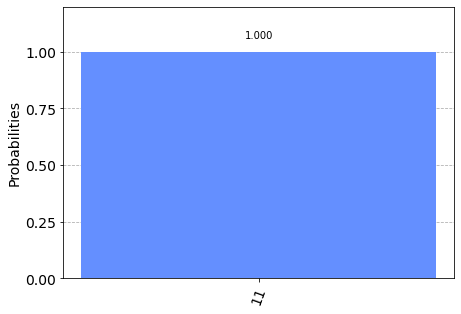

In [4]:
backend = Aer.get_backend('qasm_simulator')

job = execute(qc, backend = backend, shots=4096)

result = job.result()

counts = result.get_counts()
print(counts)

plot_histogram(counts)

# IBMQ

In [ ]:
# Run on an actual IBM Quantum Computer

from Qconfig import APItoken
IBMQ.save_account(APItoken)
IBMQ.enable_account(APItoken)

In [50]:
# IBMQ.load_account()
# %qiskit_backend_overview

provider = IBMQ.get_provider(hub='ibm-q')

# Get the least bust provider which is not a simulator.
backend = least_busy(provider.backends(simulator=False))

ibm_job = execute(qc, backend = backend, shots=4096)

In [51]:
job_monitor(ibm_job)

Job Status: job has successfully run


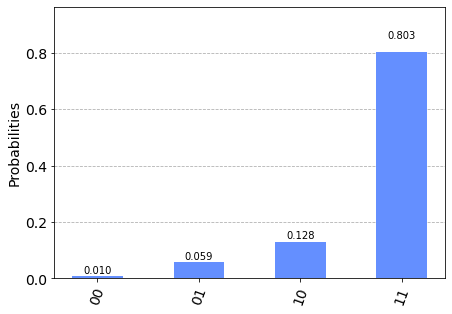

In [52]:
ibm_job_result = ibm_job.result()

plot_histogram(ibm_job_result.get_counts())

In [27]:
%qiskit_version_table